# SVM with Sklearn

### Load the iris dataset

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

### Split the data into training and test sets

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
x_train.shape, x_test.shape

((120, 2), (30, 2))

### SVM

In [5]:
from sklearn.svm import SVC

model = SVC(C=2.0, kernel="linear", random_state=42)
model.fit(x_train, y_train)

SVC(C=2.0, kernel='linear', random_state=42)

### Make predictions on the test set

In [6]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1,
       1, 1, 0, 2, 2, 1, 0, 1])

### Evaluate the model

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8333333333333334

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.70      0.78      0.74         9
           2       0.78      0.78      0.78         9

    accuracy                           0.83        30
   macro avg       0.83      0.82      0.82        30
weighted avg       0.84      0.83      0.84        30



In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
scores.mean(), scores.std()

(0.8133333333333332, 0.05416025603090642)

## Using a different kernel

In [10]:
model = SVC(C=2.0, kernel="rbf", random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8333333333333334

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.70      0.78      0.74         9
           2       0.78      0.78      0.78         9

    accuracy                           0.83        30
   macro avg       0.83      0.82      0.82        30
weighted avg       0.84      0.83      0.84        30



In [12]:
scores = cross_val_score(model, X, y, cv=5)
scores.mean(), scores.std()

(0.82, 0.058118652580542336)

# Plot different SVM classifiers

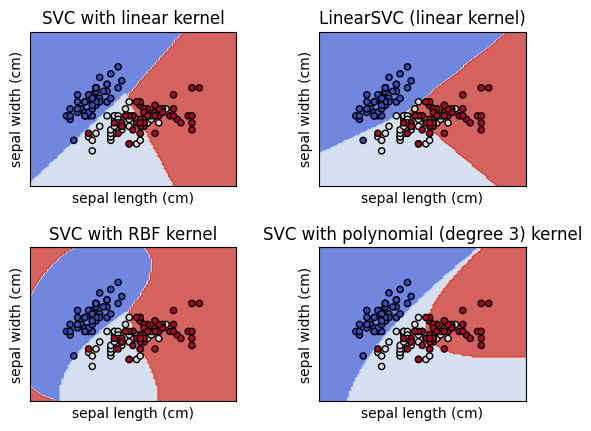

In [13]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


# Different kernels

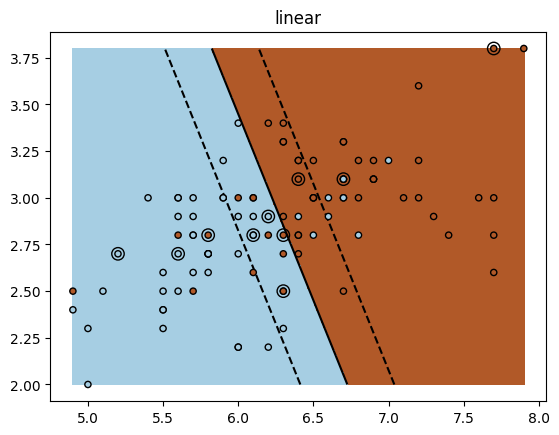

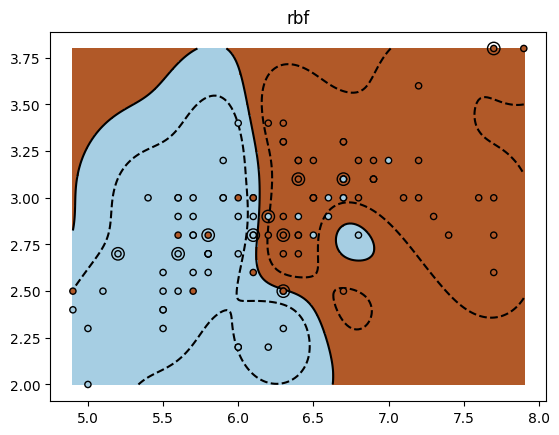

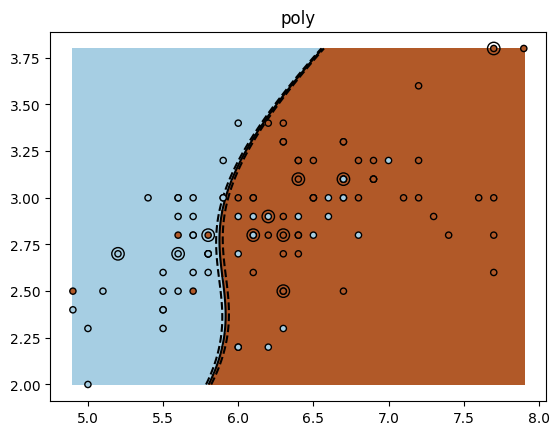

In [14]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

X_train = X[: int(0.9 * n_sample)]
y_train = y[: int(0.9 * n_sample)]
X_test = X[int(0.9 * n_sample) :]
y_test = y[int(0.9 * n_sample) :]

# fit the model
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()